In [1]:
import numpy as np
import numpy.linalg as LA

L = np.array([[0, 3, 3, 3], [0.2, 0, 0, 0], [0, 0.29, 0, 0], [0, 0, 0.1, 0]])
X0 = np.array([[1000], [2000], [1500], [500]])
# potegowanie macierzy
X10 = np.dot(LA.matrix_power(L, 10),X0)
X10 =np.floor(X10)
print('Liczebnosc klas po 10 latach')
print(X10)
print('Klasa 1: ', int(X10[0]))
print('Klasa 2: ', int(X10[1]))
print('Klasa 3: ', int(X10[2]))
print('Klasa 4: ', int(X10[3]))

Liczebnosc klas po 10 latach
[[2637.]
 [ 615.]
 [ 182.]
 [  22.]]
Klasa 1:  2637
Klasa 2:  615
Klasa 3:  182
Klasa 4:  22


In [2]:
# eigenvalues - wartosci wlasne: dl
# eigenvectors - wektory wlasne: VL
dl, VL = LA.eig(L)
# x - wektor własny odpowiadający wartosci własnej dominującej
x = VL[:,np.argmax(dl)]
print('Wektor własny')
print(x)

Wektor własny
[0.97392431+0.j 0.21586814+0.j 0.0693777 +0.j 0.00768871+0.j]


In [3]:
# tworzymy sumę wartosci wektora własnego w celu normalizacji tego wektora
suma = x[0] + x[1] + x[2] + x[3]
# normalizacja wektora własnego
X_norm = x/suma
# Wyznaczamy wartosc własną dominującą jako maximum z wartosci własnych
l1 = np.max(dl)
print('Wektor własny znormalizowany')
print(X_norm)
print("Wartosc własna dominująca")
print(l1)
print('Populacja będzię sie zmieniała co roku o czynnik{} względem roku poprzedniego'.format(l1))
# Korzystając  z faktu, że po 'długim' czasie rozkład jest proporcjonalny
# do wektora własnego dla wartosci własnej dominującej, zas grupy wiekowe
# zmnieniać się będa o czynnik l1. Ze znormalizowanego wektora
# otrzymujemy docelowe proporcje klas wiekowych.
# Wniosek:
# Poniewaz wartosc własna dominująca jest mniejsza od 1, oznacza to, że populacja
# spada (do 0). Innymi słowy populacja będzię się kurczyła.

Wektor własny znormalizowany
[0.76877097+0.j 0.17039636+0.j 0.05476356+0.j 0.00606911+0.j]
Wartosc własna dominująca
(0.9023325966248411+0j)
Populacja będzię sie zmieniała co roku o czynnik(0.9023325966248411+0j) względem roku poprzedniego


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, solve, lambdify
# Algebraiczne wyznaczenie punktów stałych i okresowych
mu = 3.5

# funkcja logistyczna
def logistic(mu, x):
    return mu*x*(1-x)

# złożenie funkcji logistycznej
def logistic2(mu, x):
    return logistic(mu, logistic(mu,x))

In [5]:
# punkty stałe
d = Symbol('d', real=True)
pkt_stale = solve(logistic(mu,d)-d, d)
print('Punkty stałe:', pkt_stale)

Punkty stałe: [0.0, 0.714285714285714]


In [6]:
# punkty okresowe o okresie 2 - wykorzystujemy funkcję jednokrotnie złożoną
pkt_okresowe = solve(logistic2(mu,d)-d, d)
print('\nPunkty okresowe:', pkt_okresowe) 


Punkty okresowe: [0.0, 0.428571428571429, 0.714285714285714, 0.857142857142857]


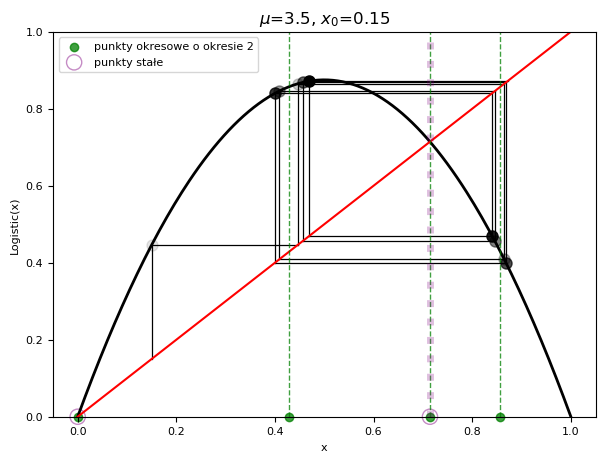

In [8]:
# Ilustracja
def logistic_cobweb(mu, x0, N):
    t = np.linspace(0, 1, 200)
    
    # wykres funkcji logistycznej:
    ax.plot(t, logistic(mu, t), 'k', lw=2)
    x = x0
    
    # wykres orbity układu:
    for i in range(N):
        y=logistic(mu, x)
        ax.plot([x,x],[x,y], 'k', lw=0.9)
        ax.plot([x,y],[y,y], 'k', lw=0.9)
        ax.plot([x], [y], 'ok', ms=8, alpha=(i+1)/N)
        x = y
    plt.title(f'$\mu$={mu}, $x_0$={x0}')
    
fig, ax = plt.subplots(figsize=(7,5))

logistic_cobweb(mu, .15, 10)

# wykres y=x:
x = np.linspace(0, 1, 200)
ax.plot(x, x, c='red')

ax.set_xlabel('x', fontsize = 8)
ax.set_ylabel('Logistic(x)', fontsize = 8)
ax.tick_params(labelsize = 8)


# zaznaczenie punktów stałych i okresowych
for i in range(1,4):
    ax.axvline(pkt_okresowe[i], linestyle='--', alpha=.75, linewidth=1, c='green')
for i in range(1,2):
     ax.axvline(pkt_stale[i], linestyle=':', alpha=.25, linewidth=5, c='purple')

ax.set_ylim([0,1])
okr = plt.scatter(pkt_okresowe, [0,0,0,0], c='green', clip_on=False, alpha=.75)
st = plt.scatter(pkt_stale, [0,0], clip_on=False, facecolors='none', edgecolors='purple', s=120, alpha=.45)

plt.legend([okr, st], ['punkty okresowe o okresie 2', 'punkty stałe'], fontsize=8)

In [10]:
# Weryfikacja stabilności punktów stałych
# Z kryterium różniczkowania:
# Sprawdzenie, czy pochodna funkcji w punkcie stałym jest mniejsza niż 1 co do modułu
x = Symbol('x')
f = mu*x*(1-x)

f_prime=f.diff(x)
print('Pochodna: ', f_prime)

Pochodna:  3.5 - 7.0*x


In [11]:
type(f_prime)

sympy.core.add.Add

In [13]:
f_prime=lambdify(x, f_prime)
type(f_prime)

function

In [14]:
# Wartości funkcji w punktach
print('Punkt', pkt_stale[0], ': ', f_prime(pkt_stale[0]))
print('Punkt', pkt_stale[1], ': ', f_prime(pkt_stale[1]))

Punkt 0.0 :  3.50000000000000
Punkt 0.714285714285714 :  -1.50000000000000


Text(0.5, 1.0, 'Diagram bifurkacji dla funkcji $G(x,\\alpha,\\beta)=e^{-\\alpha x^2}-\\beta$ \n $\\beta$=-0.5, $x_0$=0.1')

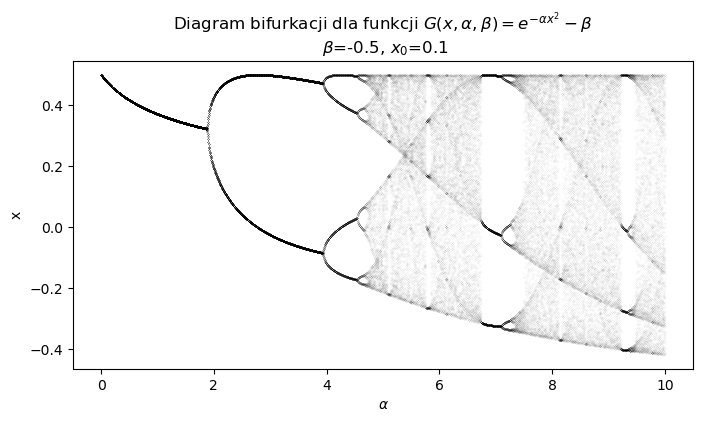

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import e
# Diagram bifurkacji
def gauss(alpha, beta,  x):
    return e**(-alpha*x**2) + beta

beta = -.5

# diagram będzie rysowany dla wartości alfa z przedziału [0,10]
alpha_values = np.linspace(0,10,2000)
y = []

for alpha in alpha_values:
    x = 0.1
    
    # "rozgrzanie" układu
    for i in range(500):
        x = gauss(alpha, beta, x)
    
    # rysowane wartości:
    for i in range(50):
        x = gauss(alpha, beta, x)
        y.append([alpha, x])
        
        
y = np.array(y)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(y[:,0], y[:,1], 'k.', markersize=0.03)

plt.xlabel('$\\alpha$', fontsize=10)
plt.ylabel('x', fontsize=10)
plt.title('Diagram bifurkacji dla funkcji $G(x,\\alpha,\\beta)=e^{-\\alpha x^2}-\\beta$ \n $\\beta$=-0.5, $x_0$=0.1')

In [16]:
# Pierwsza bifurkacja zdaje się być w przybliżeniu b1 = 1.95, druga: b2 = 3.95
# Przyjmę następującą wartość alfa:
alpha = 2.08

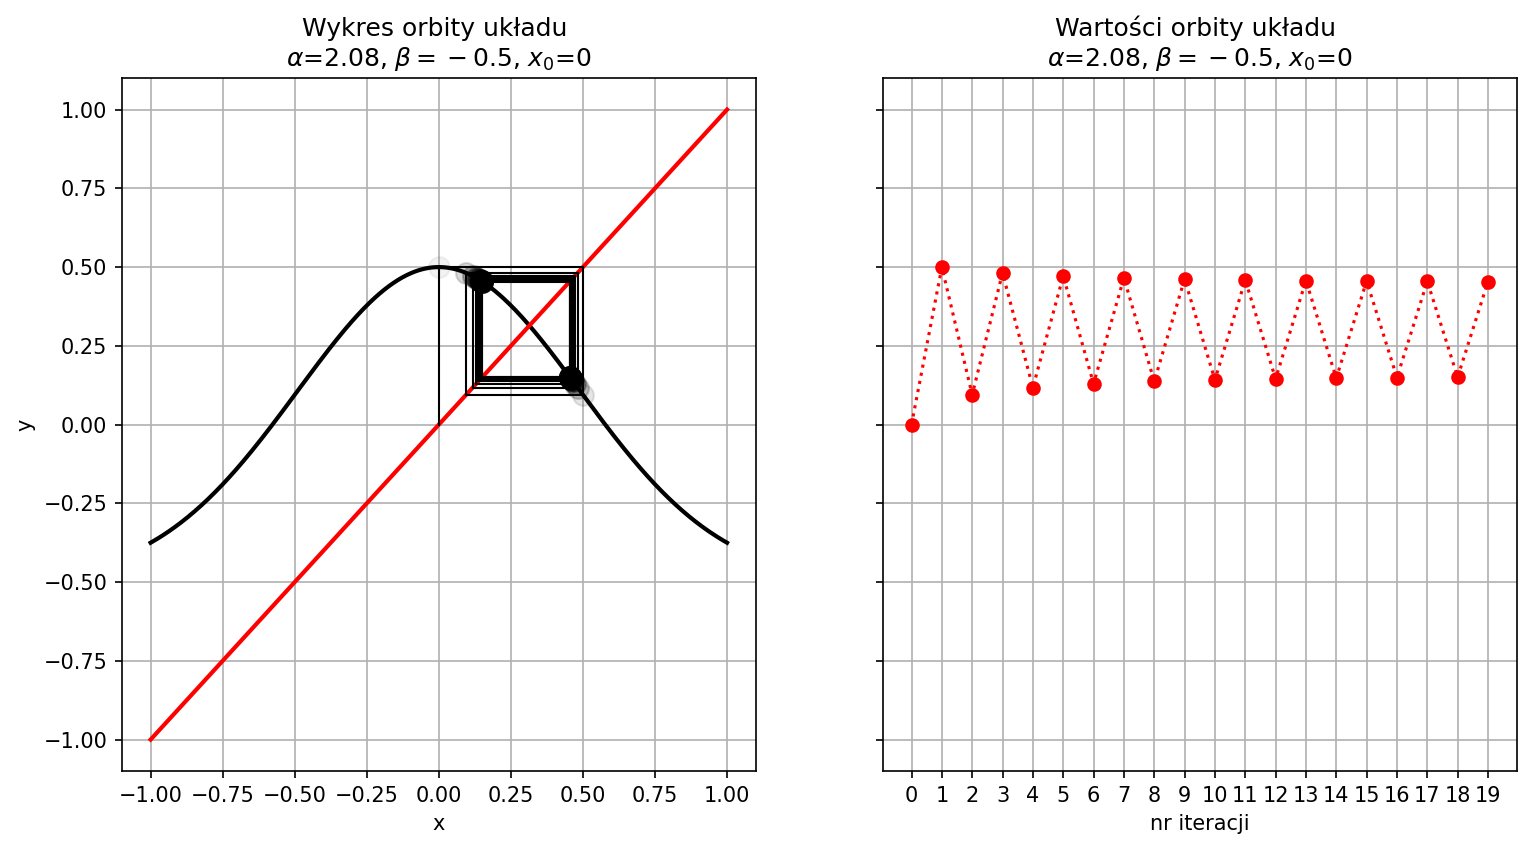

In [18]:
# Iteracje orbity układu, interpretacja długofalowego zachowania orbity
# funkcja rysująca ślad orbity układu
def cobweb(alpha, beta, x0, n, ax = None):
    t = np.linspace(-1, 1, 500)
    ax.plot(t, gauss(alpha, beta, t), 'k', lw=2)
    ax.plot([-1,1], [-1, 1], 'r', lw=2) # funkcja y=x
    x = x0
    
    for i in range(n):
        y = gauss(alpha, beta, x)
        ax.plot([x,x], [x,y], 'k', lw=1)
        ax.plot([x,y], [y,y], 'k', lw=1)
        ax.plot([x], [y], 'ok', ms=10, alpha=(i+1)/n)
        x = y
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Wykres orbity układu \n$\\alpha$={alpha}, $\\beta={beta}$, $x_0$={x0}')
    ax.grid()
    

# funkcja rysująca przyjmowane wartości orbity układu względem czasu
def gauss_iterations(alpha, beta, x0, n, ax=None):
    x = x0
    x_list = [x0]
    
    for i in range(n-1):
        x = gauss(alpha, beta, x)
        x_list.append(x)
    
    plt.plot(x_list, 'o:r')
    ax.set_xlabel('nr iteracji')
    ax.set_title(f'Wartości orbity układu \n$\\alpha$={alpha}, $\\beta={beta}$, $x_0$={x0}')
    ax.set_xticks(np.arange(20))
    ax.grid()

    
# punkt startowy x0=0, liczba iteracji n=20    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=True, dpi=150)
cobweb(alpha, beta, 0, 20, ax = ax1)
gauss_iterations(alpha, beta, 0, 20, ax=ax2)

In [19]:
# Interpretacja: 
# Układ taki będzie miał dwa stabilne punkty okresowe o okresie 2 (dla zadanego alfa są to ok. 0.14 oraz ok. 0.43).

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from math import sqrt
from math import log

# Definiujemy kontrakcje potrzebne do utworzenia trójkąta Sierpińskiego
def f1(x, y):
    return (x/2, y/2)

def f2(x, y):
    return ((x+1)/2, y/2)

def f3(x, y):
    return (x/2 + 1/4, y/2 + sqrt(3)/4)

In [21]:
# Zmienna IFS to iterowany system funkcyjny trójkąta Sierpińskiego
IFS = [f1, f2, f3]
num = 300000
# Stała Lipschitza dla naszego IFS-u to 1/2

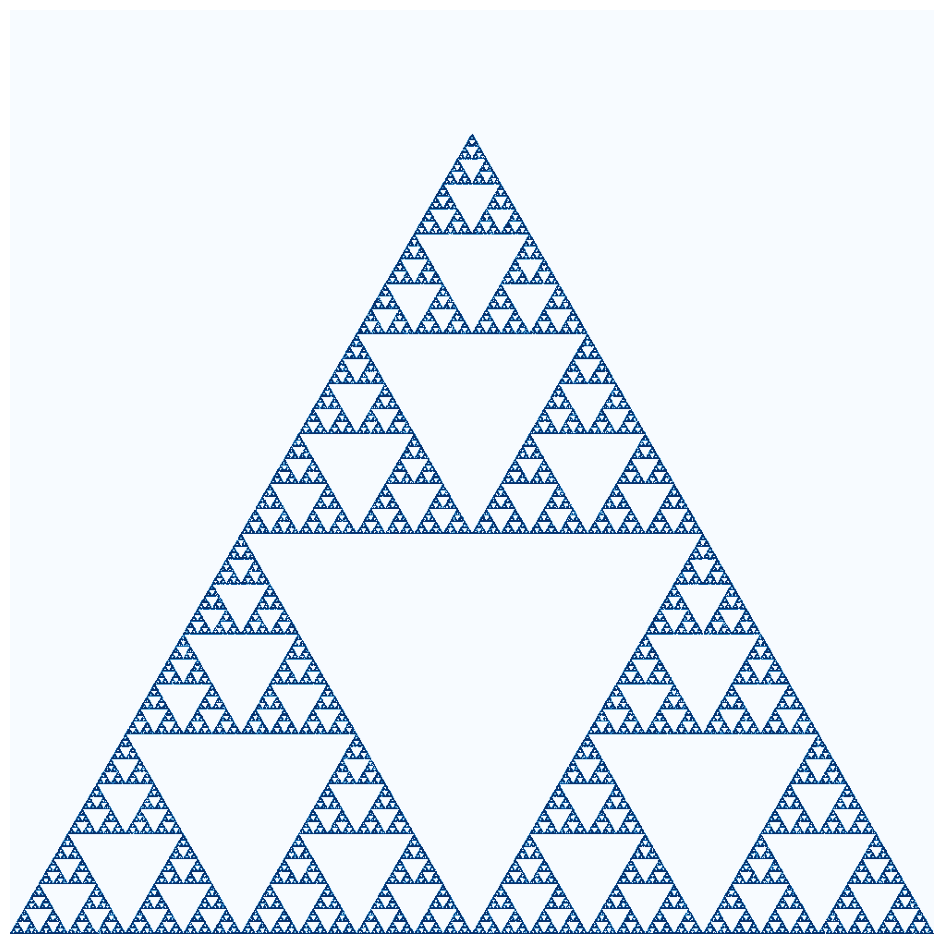

In [23]:
# Przeprowadzamy grę w chaos, której wynikiem
# będzie wykres trójkąta Sierpińskiego.
# Szerokość i wysokość rysunku
width = height = 1000
# Tworzymy zmienną, w której przechowamy wszystkie punkty otrzymane
# w wyniku gry w chaos
fern = np.zeros((width, height))
# bierzemy dowolny punkt startowy o współrzędnych x,y
x, y = 0, 0

# Nastepnie "num" razy losujemy kontrakcje z naszego iterowanego systemu
# funkcyjnego. Potem tworzymy nowy punkt jako wynik wylosowanej
# kontrakcji od poprzedniego punktu, przekształcamy i transponujemy.
for i in range(num):
    f = np.random.choice(IFS, p = [1/3, 1/3, 1/3]) # p-stwa muszą sumować się do 1
    x, y = f(x, y)
    cx, cy = int( x*width), int(y*height)
    fern[cy, cx] = 1 # transpozycja konieczna

# Po zakończeniu gry w chaos wizualizujemy nasz zbiór
fig, ax = plt.subplots(figsize = (12,12))
plt.imshow(fern[::-1, :], cmap = cm.Blues)
ax.axis('off')
plt.savefig('trójkąt_Sierpińskiego.png')

In [24]:
# Obliczamy wymiar fraktalny
# Wymiar Hausdorfa zbioru generowanego przez trójkąt Sierpińskiego:
# Przypomnijmy, że H(c) = c, czyli c jest atraktorem naszego IFS-u.
# H^S(c) = H^S(H(c)) = H^S(f1[c] u f2[c] u f3[c]) = 
# = H^S(f1[c]) + H^S(f2[c]) + H^S(f3[c]) = 
# = (1/2)^S * H^S(c) + (1/2)^S * H^S(c) + (1/2)^S * H^S(c)
# H^S(c) = (1/2)^S * H^S(c) + (1/2)^S * H^S(c) + (1/2)^S * H^S(c)
# Dzielimy otrzymane równanie przez H^S(c)
# 1 = (1/2)^S + (1/2)^S + (1/2)^S
# 1 = 3*(1/2)^S
# 1/3 = (1/2)^S => 1/3 = 1/2^S => 3 = 2^S =>s = log3/ log2
dim = log(3)/log(2)
print('Wymiar fraktalny zbioru generowanego przez Trójkąt Sierpińskiego:',dim)

Wymiar fraktalny zbioru generowanego przez Trójkąt Sierpińskiego: 1.5849625007211563
